In [1]:
import gym_duckietown as gd

DEBUG:commons:version: 6.2.4 *
DEBUG:typing:version: 6.2.3
DEBUG:duckietown_world:duckietown-world version 6.2.38 path /Users/shibu/.local/share/virtualenvs/WorldModelG15-cwtMp0YT/lib/python3.7/site-packages
DEBUG:geometry:PyGeometry-z6 version 2.1.4 path /Users/shibu/.local/share/virtualenvs/WorldModelG15-cwtMp0YT/lib/python3.7/site-packages
DEBUG:aido_schemas:aido-protocols version 6.0.59 path /Users/shibu/.local/share/virtualenvs/WorldModelG15-cwtMp0YT/lib/python3.7/site-packages
DEBUG:nodes:version 6.2.13 path /Users/shibu/.local/share/virtualenvs/WorldModelG15-cwtMp0YT/lib/python3.7/site-packages pyparsing 3.0.7
DEBUG:gym-duckietown:gym-duckietown version 6.1.31 path /Users/shibu/Workspace/WorldModelG15/env/src



{'audio': ('xaudio2', 'directsound', 'openal', 'pulse', 'silent'), 'debug_font': False, 'debug_gl': True, 'debug_gl_trace': False, 'debug_gl_trace_args': False, 'debug_graphics_batch': False, 'debug_lib': False, 'debug_media': False, 'debug_texture': False, 'debug_trace': False, 'debug_trace_args': False, 'debug_trace_depth': 1, 'debug_trace_flush': True, 'debug_win32': False, 'debug_x11': False, 'graphics_vbo': True, 'shadow_window': True, 'vsync': None, 'xsync': True, 'xlib_fullscreen_override_redirect': False, 'darwin_cocoa': True, 'search_local_libs': True}


In [2]:
from utils.env import launch_env
from utils.wrappers import NormalizeWrapper, ImgWrapper, DtRewardWrapper, ActionWrapper, ResizeWrapper
import matplotlib.pyplot as plt

/Users/shibu/.local/share/virtualenvs/WorldModelG15-cwtMp0YT/lib/python3.7/site-packages/matplotlib_inline/config.py:66: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


マップ一覧
- 4way.yaml
- 4way_bordered.yaml
- Caltech_loop01.yaml
- ETHZ_autolab_fast_track.yaml
- ETHZ_autolab_technical_track.yaml
- ETHZ_autolab_technical_track_bordered.yaml
- ETHZ_loop.yaml
- ETHZ_loop_bordered.yaml
- ETH_intersection_map.yaml
- ETH_large_intersect.yaml
- ETH_large_loop.yaml
- ETH_small_intersect.yaml
- ETH_small_loop.yaml
- ETH_small_loop_1.yaml
- ETH_small_loop_2.yaml
- ETH_small_loop_2_bordered.yaml
- ETH_small_loop_3.yaml
- ETU_autolab_track.yaml
- MOOC_modcon.yaml
- Montreal_loop.yaml
- TTIC_large_loop.yaml
- TTIC_loop.yaml
- TTIC_ripltown.yaml
- calibration_map_ext.yaml
- calibration_map_int.yaml
- experiment_loop.yaml
- field1.yaml
- loop_dyn_duckiebots.yaml
- loop_empty.yaml
- loop_obstacles.yaml
- loop_pedestrians.yaml
- regress_4way_adam.yaml
- regress_4way_drivable.yaml
- robotarium1.yaml
- robotarium2.yaml
- small_loop.yaml
- small_loop_bordered.yaml
- small_loop_cw.yaml
- straight_road.yaml
- straight_road_down.yaml
- udem1.yaml
- udem1_empty.yaml
- zigzag_dists.yaml
- zigzag_dists_bordered.yaml


In [3]:
env = launch_env(map_name="loop_pedestrians")
print("Initialized environment")

# Wrappers
env = ResizeWrapper(env)
env = NormalizeWrapper(env)
env = ImgWrapper(env)  # to make the images from 160x120x3 into 3x160x120
env = ActionWrapper(env)
env = DtRewardWrapper(env)
print("Initialized Wrappers")
# 処理後の観測
state_dim = env.observation_space.shape
print(f"state_dim: {state_dim}")
# 行動次元（２つの車輪のトルク[-1,1]）
action_dim = env.action_space.shape[0]
print(f"action_dim: {action_dim}")
# 最大トルク
max_action = float(env.action_space.high[0])
print(f"max_action: {max_action}")

INFO:gym-duckietown:Information about the graphics card:
 pyglet_version: 1.5.11
    information: dict[4]
                 │ vendor: Intel Inc.
                 │ renderer: Intel(R) Iris(TM) Plus Graphics OpenGL Engine
                 │ version: 2.1 INTEL-18.4.6
                 │ shading-language-version: 1.20
  nvidia_around: False
DEBUG:gym-duckietown:Falling back to non-multisampled frame buffer
DEBUG:gym-duckietown:Falling back to non-multisampled frame buffer
INFO:duckietown_world: data: /Users/shibu/.local/share/virtualenvs/WorldModelG15-cwtMp0YT/lib/python3.7/site-packages/duckietown_world/data
DEBUG:gym-duckietown:loading map file "/Users/shibu/.local/share/virtualenvs/WorldModelG15-cwtMp0YT/lib/python3.7/site-packages/duckietown_world/data/gd1/maps/loop_pedestrians.yaml"
INFO:gym-duckietown:done
DEBUG:gym-duckietown:loading mesh 'duckiebot' from file_path '/Users/shibu/.local/share/virtualenvs/WorldModelG15-cwtMp0YT/lib/python3.7/site-packages/duckietown_world/data/gd1/meshe

Initialized environment
Initialized Wrappers
state_dim: (3, 120, 160)
action_dim: 2
max_action: 1.0


行動は以下の通り定義されている
```python
def step(self, action: np.ndarray):
        action = np.clip(action, -1, 1)
        # Actions could be a Python list
        action = np.array(action)
        for _ in range(self.frame_skip):
            self.update_physics(action)

        # Generate the current camera image
        obs = self.render_obs()
        misc = self.get_agent_info()

        d = self._compute_done_reward()
        misc["Simulator"]["msg"] = d.done_why

        return obs, d.reward, d.done, misc
```

/Users/shibu/.local/share/virtualenvs/WorldModelG15-cwtMp0YT/lib/python3.7/site-packages/gym/utils/seeding.py:48: DeprecationWarning: WARN: Function `rng.randint(low, [high, size, dtype])` is marked as deprecated and will be removed in the future. Please use `rng.integers(low, [high, size, dtype])` instead.
  "Function `rng.randint(low, [high, size, dtype])` is marked as deprecated "
DEBUG:gym-duckietown:[3.50092526 0.         1.68724191] corresponds to tile at (5, 2) which is not drivable: {'coords': (5, 2), 'kind': 'floor', 'angle': 1, 'drivable': False, 'texture': <gym_duckietown.graphics.Texture object at 0x131e84a90>, 'color': array([1, 1, 1, 1])}
DEBUG:gym-duckietown:Invalid pose. Collision free: True On drivable area: False
DEBUG:gym-duckietown:safety_factor: 1.3
DEBUG:gym-duckietown:pos: [3.50092526 0.         1.68724191]
DEBUG:gym-duckietown:l_pos: [3.42167095 0.         1.63045278]
DEBUG:gym-duckietown:r_pos: [3.58017956 0.         1.74403104]
DEBUG:gym-duckietown:f_pos: [3.5

KeyboardInterrupt: 

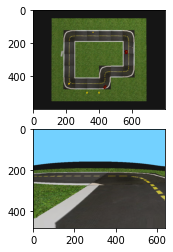

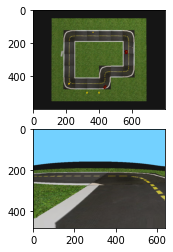

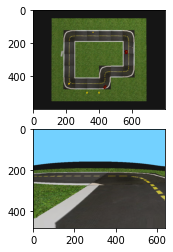

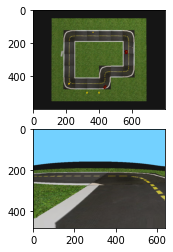

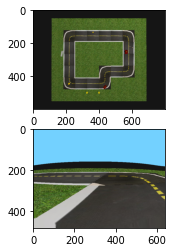

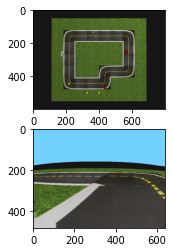

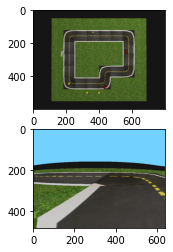

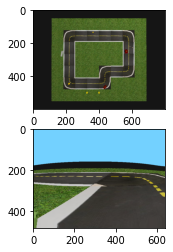

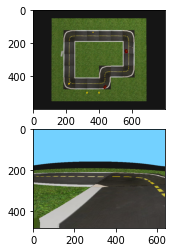

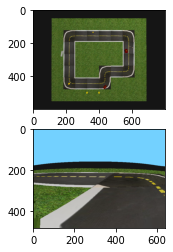

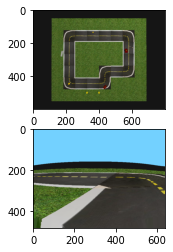

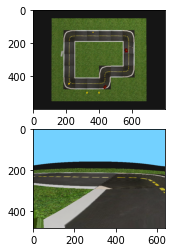

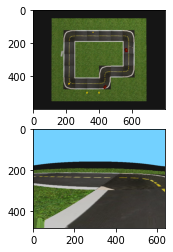

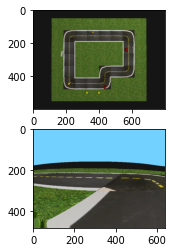

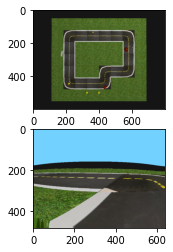

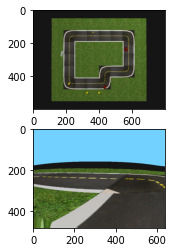

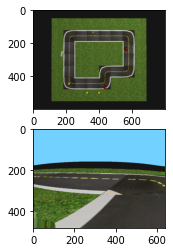

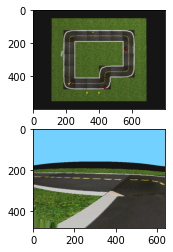

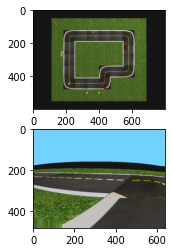

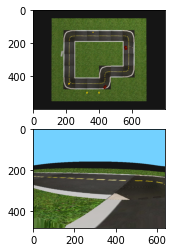

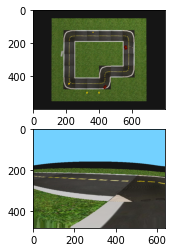

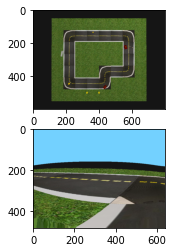

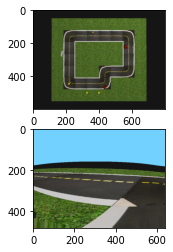

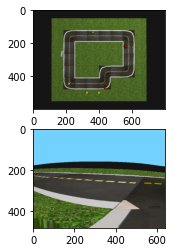

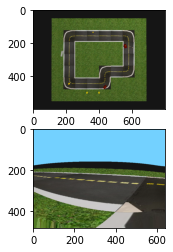

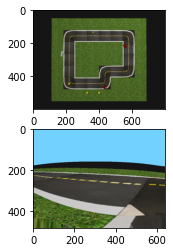

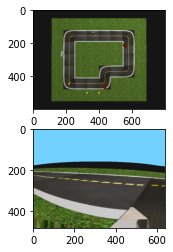

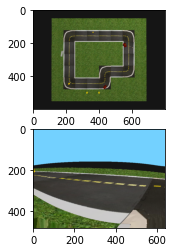

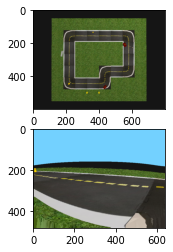

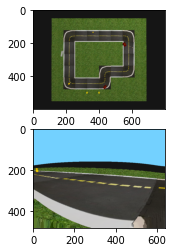

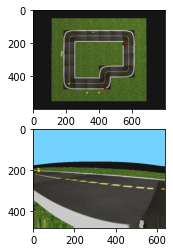

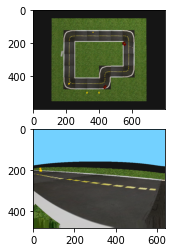

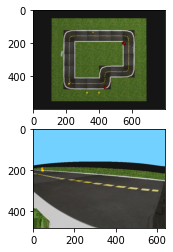

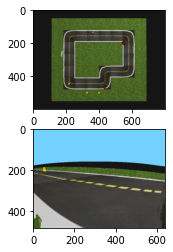

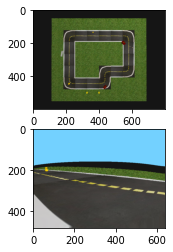

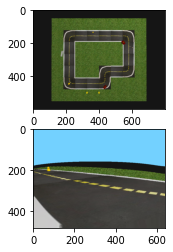

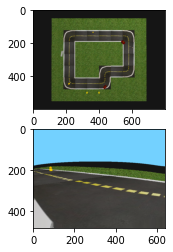

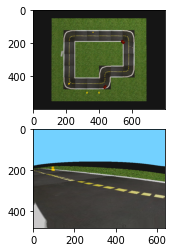

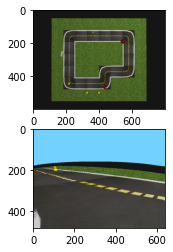

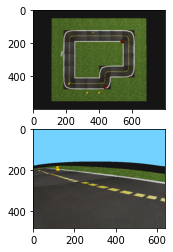

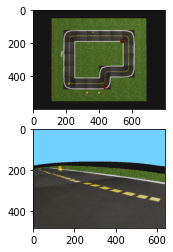

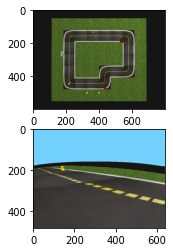

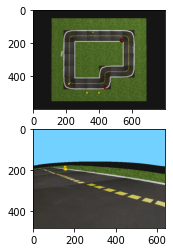

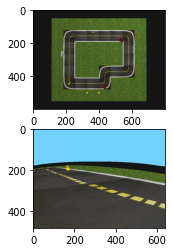

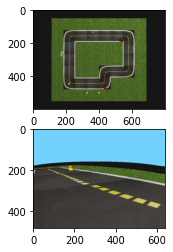

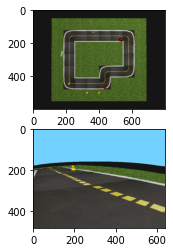

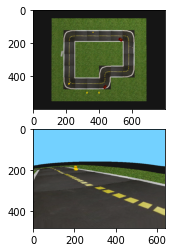

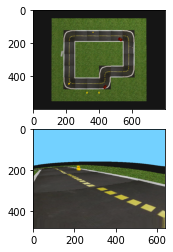

In [5]:
obs = env.reset()
import numpy as np
actions = np.ones(50, dtype=np.float32)
for t in range(50):
    obs, reward, done, _ = env.step([actions[t], actions[t]])
    topdown_img, front_img = env.render_topdown_and_front_img()
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    ax1.imshow(topdown_img)
    ax2 = fig.add_subplot(212)
    ax2.imshow(front_img)
    

In [6]:
obs = env.reset()
done = False

while True:
    while not done:
        action = policy.predict(np.array(obs))
        # Perform action
        obs, reward, done, _ = env.step(action)
        env.render()
    done = False
    obs = env.reset()

DEBUG:gym-duckietown:[3.50092526 0.         1.68724191] corresponds to tile at (5, 2) which is not drivable: {'coords': (5, 2), 'kind': 'floor', 'angle': 1, 'drivable': False, 'texture': <gym_duckietown.graphics.Texture object at 0x13a6ab850>, 'color': array([1, 1, 1, 1])}
DEBUG:gym-duckietown:Invalid pose. Collision free: True On drivable area: False
DEBUG:gym-duckietown:safety_factor: 1.3
DEBUG:gym-duckietown:pos: [3.50092526 0.         1.68724191]
DEBUG:gym-duckietown:l_pos: [3.42167095 0.         1.63045278]
DEBUG:gym-duckietown:r_pos: [3.58017956 0.         1.74403104]
DEBUG:gym-duckietown:f_pos: [3.56907221 0.         1.59213674]
DEBUG:gym-duckietown:[3.47953972 0.         1.19435151] corresponds to tile at (5, 2) which is not drivable: {'coords': (5, 2), 'kind': 'floor', 'angle': 1, 'drivable': False, 'texture': <gym_duckietown.graphics.Texture object at 0x13a6ab850>, 'color': array([1, 1, 1, 1])}
DEBUG:gym-duckietown:Invalid pose. Collision free: True On drivable area: False
DE

KeyboardInterrupt: 